# Building a model set in delimitpy

In [26]:
from delimitpy import parse_input
from delimitpy import generate_models

## Parse the configuration file.

First, we use the ModelConfigParser class to parse the information from our configuration file.

In [5]:
config_parser = parse_input.ModelConfigParser("../../examples/test1/config.txt")
config_values = config_parser.parse_config()

## Build the models, and get parameters

Next, we use functions from the ModelBuilder class to generate a baseline set of models (without parameters).<br>

Then, we use draw_parameters to draw parameterized models from the parameter space.<br>

This will return a lists of lists. Each list will correspond to a model. For each model, we have a list of parameterized versions of that model, with parameters drawn from the priors defined by the user in the configuration and species tree files.

In [15]:
# build the models
model_builder = generate_models.ModelBuilder(config_values)
model_builder.build_models()

# parameterize the models
parameterized_models, labels  = model_builder.draw_parameters()

print((f"Number of models: {len(parameterized_models)}"))
print((f"Number of replicates: {len(parameterized_models[0])}"))

INFO:delimitpy.generate_models:Creating 10 different models based on user input.


Number of models: 10
Number of replicates: 10


## Plot the models 

Now, we must ask "Are these the models I'm looking for?"

One way to easily check this is by plotting the models. The validate_models function takes as input your lists returned from the parameterization command above (draw_parameters). For each model, it will draw one parameterization at random, and plot it using functionality from the drawdemes package.

Make sure the models look like you hoped they would! Remember, you are only seeing a single parameterization for each model.

Exception: Error: Issue when plotting example msprime demographies: 'int' object is not subscriptable

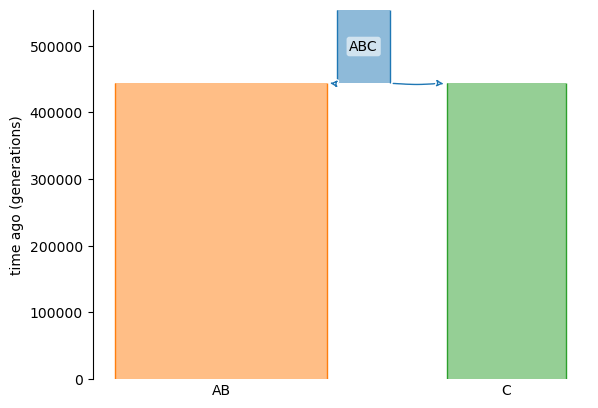

In [27]:
model_builder.validate_models(parameterized_models, labels)